# Load packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) #Set scaling for the jupyter notebook cell width - make them bigger

/tmp/ipykernel_1011/3983057131.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os
import pickle
import scanpy as sc
import scvelo as scv
import itertools
import seaborn as sbn
import scipy
from IPython.display import clear_output
import sys
from numpy import ones,vstack

from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

root = '/mnt/g' if 'mnt' in os.getcwd() else 'G:'

fig_path = '{}/My Drive/MKA/Papers/Greco/Katie/Figure_output'.format(root)

path_skin_scripts = '{}/My Drive/Python/Projects'.format(root)
sys.path.append(path_skin_scripts)
from Skin_scripts import *

In [3]:
sc.logging.print_header()

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.2 scipy==1.7.3 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.8.3 leidenalg==0.8.3 pynndescent==0.5.4


In [4]:
def plot_basal_suprabasal_cutoff_v2(ax, x0 = -2.5, x1 = 1, m = -1.09807084, c = 5.8597005, ls = '--', color = 'dimgrey', lw = 2): 
    ax.plot([x0,x1], [m*x0+c, m*x1+c], ls = ls, c = color, lw = lw)

## Load main dataset

In [5]:
filename = 'NCB_2022_final_integrated_dataset'
path = '/mnt/g/My Drive/MKA/Papers/Greco/Katie/2022_NCB_Final/Data upload'
adata= sc.read_h5ad(os.path.join(path, f'{filename}.h5ad'))
adata.raw = sc.read_csv(os.path.join(path, f'{filename}_downscaled_raw_counts.csv'))

b_sb_cutoff = 0.8725141776937618
adata.obs['binned_delamination'] = pd.Categorical(adata.obs['binned_delamination'])

In [6]:
adata

AnnData object with n_obs × n_vars = 2646 × 842
    obs: 'batch', 'cell_identity', 'Ivl_cells', '10x_leiden', 'total_counts', 'total_counts_ERCC', 'total_counts_mito', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_ERCC', 'log1p_total_counts_mito', 'n_genes_by_counts', 'pct_counts_ERCC', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'pct_counts_mito', 'S_score', 'G2M_score', 'phase_c0.05', 'Krt10 class', 'Krt10_class_mean', 'Location', 'clustering', 'pred_cluster_imp', 'dpt_ordered', 'dpt_pseudotime', 'binned_delamination', 'dpt_binned', 'umap_density_Ivl_cells', 'umap_density_Krt10 class', 'umap_density_batch', 'umap_density_cell_identity', 'umap_density_pred_cluster'
    var: 'ERCC-C1', 'dispersions-ife-C1', 'dispersions-ivl-C1', 'dispersions_norm-ife-C1', 'dispersions_norm-ivl-C1', 'highly_variable-C1', 'log1p_mean_counts-10x', 'log1p_mean_counts-ife-C1', 'log1p_mean_counts-ivl-C1', 'l

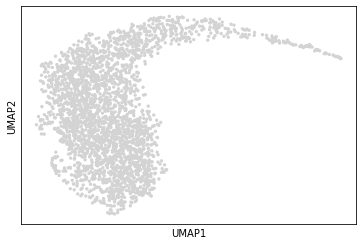

In [7]:
sc.pl.umap(adata)
clear_output()
sc.pl.umap(adata)

In [8]:
old_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
new_colors = ['#00FF00', '#FFE000', '#FF9900', '#FF3300', '#CC0000']
adata.uns['pred_cluster_imp_colors'] = new_colors

## Load spliced-unspliced data

For figure 2G-I

In [9]:
path = '/mnt/g/My Drive/MKA/Epidermal stem cells at the point of no return/Sequencing results/Combined_With_Joost_IFE/'
velo_data = sc.read_loom(os.path.join(path, '10X_16_combined_IFE_cells.loom'))

In [10]:
scv.pp.show_proportions(velo_data)
scv.pp.filter_genes(velo_data, min_counts_u = 10)
scv.pp.filter_genes(velo_data, min_cells_u = 3)
sc.pp.normalize_total(velo_data)
sc.pp.log1p(velo_data)
sc.pp.scale(velo_data)

Abundance of ['spliced', 'unspliced']: [0.86 0.14]
Filtered out 48436 genes that are detected 10 counts (unspliced).
Filtered out 9 genes that are detected in less than 3 cells (unspliced).


In [11]:
velo_data.obs_names = [f'{x[1][:-1]}-{x[0].split("_")[-1][:2]}-10x' for x in velo_data.obs_names.str.split(':')]
velo_data = velo_data[~velo_data.obs_names.duplicated()].copy()
velo_data = velo_data[velo_data.obs_names.intersection(adata.obs_names)].copy()
velo_data.obs = adata.obs.loc[velo_data.obs_names]

In [12]:
velo_data

AnnData object with n_obs × n_vars = 1846 × 5787
    obs: 'batch', 'cell_identity', 'Ivl_cells', '10x_leiden', 'total_counts', 'total_counts_ERCC', 'total_counts_mito', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_ERCC', 'log1p_total_counts_mito', 'n_genes_by_counts', 'pct_counts_ERCC', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'pct_counts_mito', 'S_score', 'G2M_score', 'phase_c0.05', 'Krt10 class', 'Krt10_class_mean', 'Location', 'clustering', 'pred_cluster_imp', 'dpt_ordered', 'dpt_pseudotime', 'binned_delamination', 'dpt_binned', 'umap_density_Ivl_cells', 'umap_density_Krt10 class', 'umap_density_batch', 'umap_density_cell_identity', 'umap_density_pred_cluster'
    var: 'mean', 'std'
    uns: 'log1p'
    obsm: 'X_umap_ingest'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

## Load replicate data

For figures 3 and S8

In [13]:
replicates = pd.read_csv(os.path.join(path, '201806201840_assigned_barcodes.txt'), sep = '\t', index_col = None, header = None)

replicates = replicates.drop_duplicates(subset = 0).set_index(0)
replicates.index = replicates.index.str[:14]

tmp10x = adata[adata.obs['batch'] == '10x']
tmp10x.obs['replicates'] = replicates.loc[tmp10x.obs_names.str[:14]].values.flatten()
tmp10x = tmp10x[tmp10x.obs['replicates']!='unassigned']
clear_output()

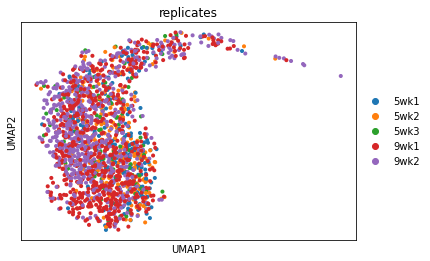

In [14]:
tmp_data = tmp10x[(tmp10x.obs['cell_identity'] == '10x') & (tmp10x.obs['Krt10 class'] == 'Krt10+')].copy()
sc.pl.umap(tmp10x, color = 'replicates')

# Figure 2

## 2A

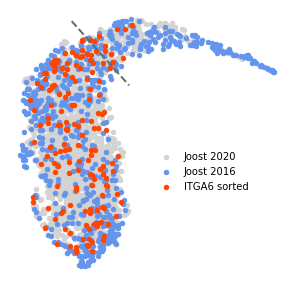

In [15]:
cmap = ['lightgrey','cornflowerblue', 'orangered']
adata.uns['batch_colors'] = [mpl.colors.cnames[x] for x in cmap]

fig, ax = plt.subplots(figsize = (5,5))
batches = ['10x', 'C1', 'Ivl']

for ix, batch in enumerate(batches):
    tmp = adata[adata.obs['batch']==batch]
    umap = tmp.obsm['X_umap']
    ax.scatter(x = umap[:, 0], y = umap[:, 1], color = tmp.uns['batch_colors'], s = 20, alpha = 1)

ax.legend(labels = ['Joost 2020','Joost 2016','ITGA6 sorted'], frameon = False, bbox_to_anchor = (0.5,0.5))
clean_axis(ax)
clear_output()
plot_basal_suprabasal_cutoff_v2(ax)

#plt.savefig(os.path.join(fig_path, 'UMAP_ingest_batch_wider_cutoffLine.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

## 2B

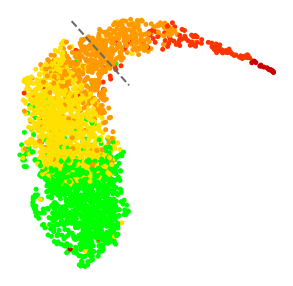

In [16]:
fig, ax = plt.subplots(figsize = (5,5))
sc.pl.umap(adata, color = 'pred_cluster_imp', ax = ax, 
           show = False, frameon = False, title = '', s = 100)
handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()

plot_basal_suprabasal_cutoff_v2(ax)

#fig.savefig(os.path.join(fig_path, 'UMAP_pred_cluster_imp_cutoff_new_colors_bigger_dots.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

[<AxesSubplot:>]


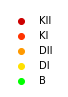

In [17]:
fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles[::-1], labels = [x.split(' ')[-1] for x in labels][::-1],
     frameon = False)
clean_axis(ax)
#fig.savefig(os.path.join(fig_path, 'UMAP_pred_cluster_imp_cutoff_new_colors_legend.pdf'), pad_inches = 0, bbox_inches = 'tight', dpi = 600)

## 2C

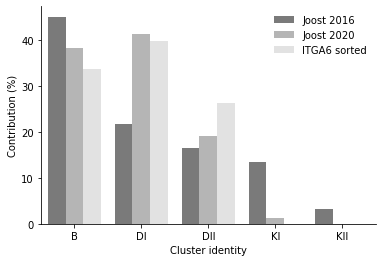

In [18]:
fig, ax = plt.subplots()
df = pd.DataFrame(adata.obs.groupby(by = 'batch')['pred_cluster_imp'].value_counts().div(adata.obs.groupby(by = 'batch')['pred_cluster_imp'].count())*100)
df = df.reset_index()
df.columns = ['batch', 'pred_cluster_imp', 'Contribution (%)']
df['pred_cluster_imp'] = [x.split(' ')[-1] for x in df['pred_cluster_imp']]

sbn.barplot(data = df, x = 'pred_cluster_imp', y = 'Contribution (%)', hue = 'batch', order = ['B','DI','DII','KI','KII'], hue_order = ['C1','10x','Ivl'], palette = sbn.color_palette(palette = 'Greys_r', n_colors=4)[1:], ax = ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles, 
          labels = ['Joost 2016', 'Joost 2020','ITGA6 sorted'], 
          loc = 'upper right', frameon = False)
ax.set_xlabel('Cluster identity')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#fig.savefig(os.path.join(fig_path, 'IFE_Barplot_Clustering_percentage_per_Batch.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

## 2D

[<AxesSubplot:>]
[<AxesSubplot:>]


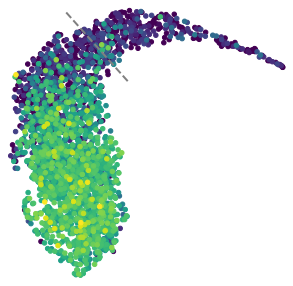

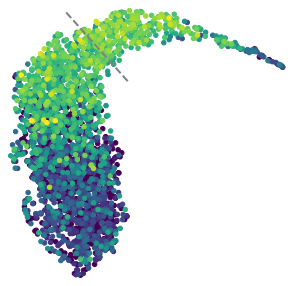

In [19]:
percentile = 99.9
add_perc = 0.2

genes = ['Krt14','Krt10']
genes = [x for x in genes if x in adata.raw.var_names]

for gene in genes:
    fig, ax = plt.subplots(figsize = (5,5))
    
    vmax = np.percentile(adata.raw.X[:, np.where(
        adata.raw.var_names == gene)[0]].flatten(), q = percentile)
    umap = adata.obsm['X_umap']
    expression = adata.raw.X[:,np.where(adata.raw.var_names == gene)[0]]
    
    expression = expression.flatten()
    rank = np.argsort(expression)
    expression = np.array(expression)[rank]
    umap = np.array(umap)[rank]
    
    ax.scatter(x = umap[:, 0], y = umap[:, 1], c = expression, cmap = 'viridis', s = 20, alpha = 1, vmax = vmax)
    
    ax.set_xlim([umap[:,0].min()-add_perc, umap[:,0].max()+add_perc])
    ax.set_ylim([umap[:,1].min()-add_perc, umap[:,1].max()+add_perc])
    plot_basal_suprabasal_cutoff_v2(ax, color = 'grey')
    clean_axis(ax)
    
    #plt.savefig(os.path.join(fig_path, 'IFE_umap_expression_downsampled_wider_cutoffLine_{}.pdf'.format(gene)), transparent = True, bbox_inches = 'tight', dpi = 600)

In [20]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1, figsize = (5,0.2))

ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('viridis'))
pos = list(ax.get_position().bounds)
ax.set_axis_off()

#plt.savefig(os.path.join(fig_path, 'Viridis_cbar.png'), transparent = True, bbox_inches = 'tight', dpi = 600)

## 2E

ax = axes[ix]


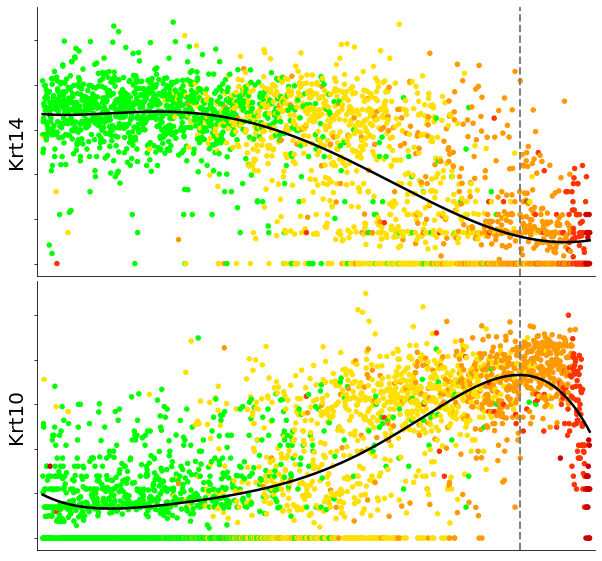

In [21]:
line_kwargs = {'c': 'k', 'ls': '-', 'lw': 2.5}
genes = ['Krt14','Krt10']
ncols = 1

fig, axes = initialize_subplots(len(genes), ncols = ncols, gridspec_kw = {'hspace': 0.02}, sharey = True, figsize_multiplier=(10, 5))

for ix, g in enumerate(genes):
    ax = axes[ix]
    plot_pseudotime_gene_expression(adata, g, color = 'pred_cluster_imp', pseudotime_col='dpt_ordered', use_raw=True,
                                plot_regression=True, regression_step_size=0.0001, regressionLineOrder=5, legend = False,
                                **line_kwargs, plot_reg_expr_intercept=False, ax = ax, cbar = False, s=20)
    ax.axvline(b_sb_cutoff, c ='grey', linewidth = 2, zorder = 1, ls = '--')
    ax.set_yticklabels([x.get_text() for x in list(ax.get_yticklabels())])
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.set_ylabel(g, fontsize = 20)
    
    for side in ['top','right']:
        ax.spines[side].set_visible(False)
    
#plt.savefig(os.path.join(fig_path, 'PTO_dpt-ordered_Krt14_Krt10_grey_cutoff.png'), transparent = True, bbox_inches = 'tight', dpi = 600)

[<AxesSubplot:>]


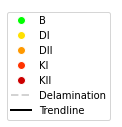

In [22]:
fig, ax = plt.subplots(figsize = (0.5,0.5))
handles = [Line2D([0], [0], marker = 'o', color = 'w', label = label.split(' ')[-1], 
                      markerfacecolor = col, markersize = 8) 
                    for label, col in zip(adata.obs['pred_cluster_imp'].cat.categories, adata.uns['pred_cluster_imp_colors'])]

handles.append(Line2D([0], [0], color='lightgrey', lw=2, label='Delamination', linestyle = '--'))
handles.append(Line2D([0], [0], color='k', lw=2, label='Trendline'))

ax.legend(handles = handles, ncol = 1, frameon = True)
clean_axis(ax)
#plt.savefig(os.path.join(fig_path, 'PTO_dpt-ordered_Krt14_Krt10_legend_dots.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

### Colorbar

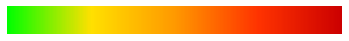

In [23]:
colors = adata.uns['pred_cluster_imp_colors']
n_colors = 11

norm=plt.Normalize(0,n_colors)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", [mpl.colors.to_rgb(x) for x in colors])
m = mpl.cm.ScalarMappable(cmap=cmap, norm = norm)
c = [mpl.colors.to_hex(m.to_rgba(x)) for x in np.arange(0,10)]

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_ticks([])
cb1.outline.set_visible(False)
#plt.savefig(os.path.join(fig_path, 'GrYlRd_cbar.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600, pad_inches = 0)

## 2F

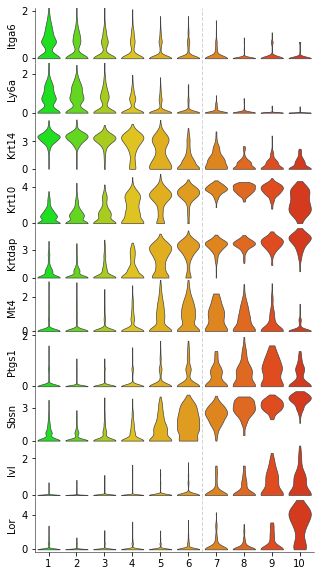

In [24]:
mpl.rcParams['axes.linewidth'] = 0.5

q = 99.9
new_col = 'binned_delamination'

genes = ['Itga6', 'Ly6a', 'Krt14', 'Krt10', 'Krtdap', 'Mt4', 'Ptgs1', 'Sbsn','Ivl','Lor']
fig, axes = initialize_subplots(len(genes), ncols = 1, figsize_multiplier=(5, 1), sharex = True, gridspec_kw = {'hspace': 0.0})

for ix, g in enumerate(genes):
    ax = axes[ix]
    sc.pl.violin(adata, keys = g, groupby = new_col, cut = 0, rotation = 0, ax = ax, show = False, stripplot = False, linewidth = 0.7, palette = c)
    
    if g in ['Itga6','Ly6a', 'Mt4']:
        vmax = np.percentile(adata.raw[:, g].X, q = q)
        ax.set_ylim([ax.get_ylim()[0], vmax])
    
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins = 2))
    if ix < len(genes)-1:
        ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
                  
    if ix == len(genes)-1:
        ax.set_xticklabels([str(int(float(x.get_text()))) for x in ax.get_xticklabels()])
    else:
        ax.spines['bottom'].set_visible(False)
    ax.axvline(5.5, ls = '--', c = 'lightgrey', lw = 1)
clear_output()
#fig.savefig(os.path.join(fig_path, 'Binned_dpt_pseudotime_violinplots_v3.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

mpl.rcParams['axes.linewidth'] = 1

## 2G

In [25]:
suprabasal_genes = ['Krt10','Krt1','Krtdap', 'Mt4', 'Sbsn', 'Ivl', 'Lor', 'Lgals3']
basal_genes = ['Krt14','Krt5', 'Itga6','Ly6a', 'Cyr61']

rank = np.argsort(adata.obs['dpt_ordered']).values
dpt = adata[rank].obs['dpt_ordered'].values

In [26]:
bins = adata.obs.groupby(by = 'binned_delamination')['dpt_ordered'].min()
bin_centers = []
for ix, b in enumerate(bins.values):
    if ix == 0:
        continue
    else:
        bin_centers.append((bins.values[ix-1]+b)/2)
bin_centers.append((1+bins.values[-1])/2)

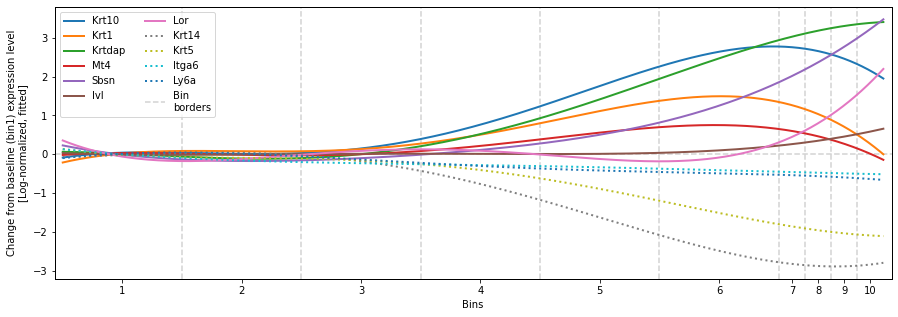

In [27]:
genes = ['Krt10','Krt1','Krtdap', 'Mt4', 'Sbsn', 'Ivl', 'Lor', 'Krt14','Krt5', 'Itga6','Ly6a']

chosen_bin = 1.0
polyfit_deg = 4

fig, ax = plt.subplots(figsize = (15, 5))
ls = {0: '-',
      1: ':',
      2: '--',
      3: '-.'}

for gene in genes:
    expr = adata.raw[rank][:, gene].X.flatten()
    mean = expr[np.where(adata.obs['binned_delamination'][rank]==chosen_bin)[0]].mean()
    p = np.poly1d(np.polyfit(dpt, expr, polyfit_deg))(dpt)
    ax.plot(dpt, p-mean, ls = ':' if gene in basal_genes else '-', lw = 2)
    clear_output(wait = True)
for l in bins.values:
    if l != 0:
        ax.axvline(l, c = 'lightgrey', ls = '--', zorder = 0, alpha = 1)

ax.legend(labels = genes+['Bin\nborders'], loc = 'upper left', ncol = 2)
ax.set_xlim([-0.01, 1.01])
ax.set_xticks(bin_centers)
ax.set_xticklabels(np.arange(1,11))
ax.set_ylabel('Change from baseline (bin1) expression level\n[Log-normalized, fitted]')
ax.set_xlabel('Bins')
ax.axhline(0, ls = '--', c = 'lightgrey', zorder = -1)

#fig.savefig(os.path.join(fig_path, 'Binned_dpt_pseudotime_change_over_baseline_expressed_genes_v2.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

## 2H

In [28]:
ivl_data = adata[adata.obs['batch'] == 'Ivl']

[<AxesSubplot:xlabel='dpt_ordered'>]


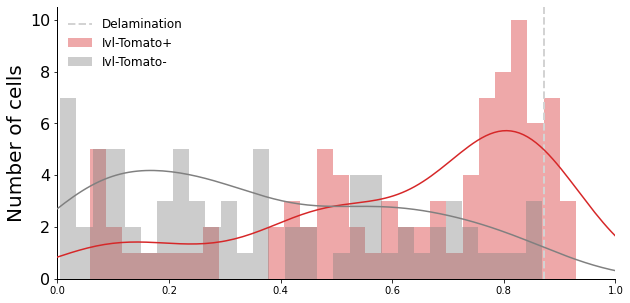

In [29]:
pto = 'dpt_ordered'
cmap = mpl.cm.viridis

fig, ax = plt.subplots(1, figsize = (10, 5))
tmp = ivl_data.obs[[pto,'cell_identity']]

g = sbn.distplot(tmp[tmp['cell_identity'] == 'Tomato+'][pto], bins = 30, ax = ax, rug = False, color = 'tab:red', kde = False)
g = sbn.distplot(tmp[tmp['cell_identity'] == 'Tomato-'][pto], bins = 30, ax = ax, rug = False, color = 'grey', kde = False)
    
ax2 = ax.twinx()
g = sbn.distplot(tmp[tmp['cell_identity'] == 'Tomato+'][pto], bins = 30, ax = ax2, rug = False, color = 'tab:red', hist = False)
g = sbn.distplot(tmp[tmp['cell_identity'] == 'Tomato-'][pto], bins = 30, ax = ax2, rug = False, color = 'grey', hist = False)

ax2.set_ylim([0, 3.5])
ax2.set_ylabel('')
ax2.set_yticks([])

ax.set_xlim([0, 1])

ax.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylabel('Number of cells', fontsize = 20)
ax.set_xlabel('')
ax.axvline(b_sb_cutoff, c = 'lightgrey', linewidth = 2, zorder = 1, ls = '--')

ax.legend(labels = ['Delamination', 'Ivl-Tomato+','Ivl-Tomato-'], frameon = False, fontsize = 12)
clean_axis(ax2)

for side in ['top','right']:
    ax.spines[side].set_visible(False)

#fig.savefig(os.path.join(fig_path, 'Ivl_cells_over_pseudotime_smaller_noCbar.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 300)

## 2I

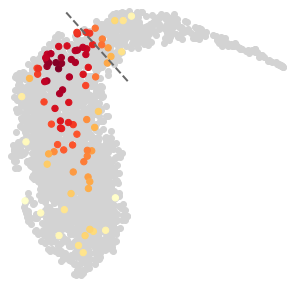

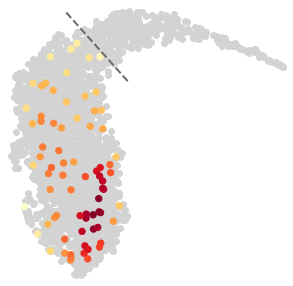

In [30]:
add_perc = 0.2
grouping = 'cell_identity'
for ix, cat in enumerate(['Tomato+', 'Tomato-']):
    fig, ax = plt.subplots(figsize = (5,5))
                           
    umap = adata.obsm['X_umap']
    
    tmp_values_pos = adata[adata.obs[grouping]==cat].obs['umap_density_{}'.format(grouping)].values
    tmp_umap_pos = adata[adata.obs[grouping]==cat].obsm['X_umap']
    
    ax.scatter(x = umap[:, 0], y = umap[:, 1], color = 'lightgrey')
    color = [plt.cm.YlOrRd(x) for x in tmp_values_pos]
    ax.scatter(x = tmp_umap_pos[:, 0], y = tmp_umap_pos[:, 1], color = color, s = 40)
    
    ax.set_xlim([umap[:,0].min()-add_perc, umap[:,0].max()+add_perc])
    ax.set_ylim([umap[:,1].min()-add_perc, umap[:,1].max()+add_perc])
    
    clean_axis(ax)
    
    plot_basal_suprabasal_cutoff_v2(ax)
    
    #fig.savefig(os.path.join(fig_path, 'IFE_umap_embedding-density_{}_{}_wider.pdf'.format(grouping, cat)), transparent = True, bbox_inches = 'tight', dpi = 600)
clear_output()

In [31]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1, figsize = (5,0.2))

ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('YlOrRd'))
pos = list(ax.get_position().bounds)
ax.set_axis_off()

#plt.savefig(os.path.join(fig_path, 'YlOrRd_cbar.png'), transparent = True, bbox_inches = 'tight', dpi = 600)

## 2J

In [32]:
cmap1 = sbn.color_palette(palette = 'Greys', n_colors=5)[::3]
sbn.color_palette(cmap1)

cmap2 = sbn.color_palette(palette = 'Greys', n_colors=5)[3::3]
sbn.color_palette(cmap2)

[(0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

ax = axes[ix]


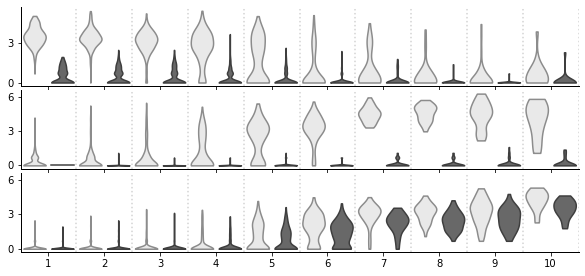

In [33]:
tmp_df = velo_data.obs.copy()
for g, l in itertools.product(['Krt10','Krt14','Krtdap'], ['spliced','unspliced']):
    tmp_df['{}_{}'.format(g, l)] = np.log1p(velo_data[:, g].layers[l].toarray())
    
ncols = 1
fig, axes = initialize_subplots(groups_to_plot=3, ncols = ncols, figsize_multiplier=(10,1.5), gridspec_kw = {'wspace': 0.2, 'hspace': 0.05}, sharex = True)

ylim_max = 0
for ix, gene in enumerate(['Krt14','Krt10', 'Krtdap']):
    ax = axes[ix]
    
    tmp = tmp_df.melt(id_vars=['binned_delamination'], value_vars=['{}_spliced'.format(gene), '{}_unspliced'.format(gene)], var_name='Splicing', value_name=gene)
    tmp['binned_delamination'] = [float(tmp.iloc[ix]['binned_delamination'])-0.2 if '_spliced' in x else float(tmp.iloc[ix]['binned_delamination'])+0.2 for ix, x in enumerate(tmp['Splicing'])]

    sbn.violinplot(data = tmp, x = 'binned_delamination', y = gene, hue = 'Splicing', ax = ax, hue_order = ['{}_spliced'.format(gene)], cut = 0, palette = cmap1, scale = 'area', width = 0.8, inner = None)
    sbn.violinplot(data = tmp, x = 'binned_delamination', y = gene, hue = 'Splicing', ax = ax, hue_order = ['{}_unspliced'.format(gene)], palette = cmap2, cut = 0, scale = 'area', width = 0.8, inner = None)
    handles, labels = ax.get_legend_handles_labels()
    ax.set_xticks([x-0.5+ix for ix, x in enumerate(range(1,11,1))])
    ax.set_xticklabels([str(x) for x in range(1,11,1)])
    [ax.axvline(x, ls = ':', c = 'lightgrey') for x in np.arange(1.5, 20, 2)]
    ax.set_ylabel('{}'.format(gene))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins = 3))
    if ax.get_ylim()[1] > ylim_max:
        ylim_max = ax.get_ylim()[1]
    ax.set_ylim([ax.get_ylim()[0], ylim_max])
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    [ax.spines[spine].set_visible(False) for spine in ['top', 'right']]

#fig.savefig(os.path.join(fig_path, 'Main_dataset_K14_K10_Krtdap_spliced-unspliced_violinplot_Log_v2.pdf'), dpi = 600, bbox_inches = 'tight')

## 2K

In [34]:
colors = ['#00FF00', '#FFE000', '#FF9900', '#FF3300', '#CC0000']
n_colors = 11

norm=plt.Normalize(0,n_colors)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", [mpl.colors.to_rgb(x) for x in colors])
m = mpl.cm.ScalarMappable(cmap=cmap, norm = norm)
#c = [mpl.colors.to_hex(m.to_rgba(x)) for x in np.append(np.arange(0,6),np.append(np.arange(n_colors-6,n_colors-4), np.arange(n_colors-2,n_colors)))]
c = [mpl.colors.to_hex(m.to_rgba(x)) for x in np.arange(0,10)]

### Krt14 vs Krt10

ax = axes[ix]


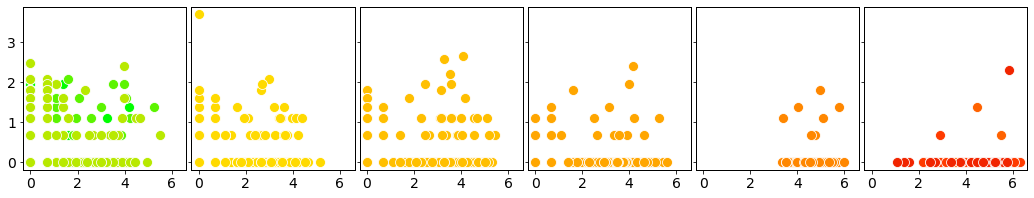

In [35]:
tmp = velo_data[:, ['Krt14','Krt10']].copy()

x_g = 'Krt10 spliced'
y_g = 'Krt14 unspliced'
groups = tmp.obs['binned_delamination'].cat.categories
ncols = 10-2-2
groups_to_plot = len(groups)-2-2

fig, axes = initialize_subplots(groups_to_plot=groups_to_plot, ncols = ncols, figsize_multiplier = (3,3), gridspec_kw = {'wspace': 0.03, 'hspace': 0.03}, sharey = True, sharex = True)

ix = 0

for g_ix, g in enumerate(groups):
    if g not in [2.0, 3.0, 9.0, 10.0]:
        ax = get_ax(axes, ix, ncols)
        ix+=1
    
    tmp2 = tmp[tmp.obs['binned_delamination']==g]
    x = np.log1p(tmp2[:, x_g.split(' ')[0]].layers[x_g.split(' ')[1]].toarray().flatten())
    y = np.log1p(tmp2[:, y_g.split(' ')[0]].layers[y_g.split(' ')[1]].toarray().flatten())
    sbn.scatterplot(x = x, y = y, ax = ax, color = c[g_ix], s = 100)
    
    ax.set_ylabel('', fontsize = 12)
    ax.set_xlabel('', fontsize = 12)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)
    
#fig.savefig(os.path.join(fig_path, f'Main dataset scatterplot {x_g} VS {y_g} counts_GrYlRd_1x6_combined_bins.pdf'), dpi = 600, bbox_inches = 'tight')

### Krt14 vs Krtdap

ax = axes[ix]


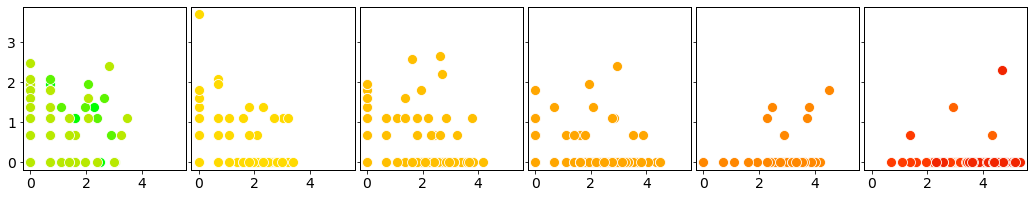

In [36]:
tmp = velo_data[:, ['Krt14','Krtdap']].copy()

x_g = 'Krtdap spliced'
y_g = 'Krt14 unspliced'
groups = tmp.obs['binned_delamination'].cat.categories
ncols = 10-2-2
groups_to_plot = len(groups)-2-2

fig, axes = initialize_subplots(groups_to_plot=groups_to_plot, ncols = ncols, figsize_multiplier = (3,3), gridspec_kw = {'wspace': 0.03, 'hspace': 0.03}, sharey = True, sharex = True)

ix = 0

for g_ix, g in enumerate(groups):
    if g not in [2.0, 3.0, 9.0, 10.0]:
        ax = get_ax(axes, ix, ncols)
        ix+=1
    
    tmp2 = tmp[tmp.obs['binned_delamination']==g]
    x = np.log1p(tmp2[:, x_g.split(' ')[0]].layers[x_g.split(' ')[1]].toarray().flatten())
    y = np.log1p(tmp2[:, y_g.split(' ')[0]].layers[y_g.split(' ')[1]].toarray().flatten())
    sbn.scatterplot(x = x, y = y, ax = ax, color = c[g_ix], s = 100)
    
    ax.set_ylabel('', fontsize = 12)
    ax.set_xlabel('', fontsize = 12)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)
    
#fig.savefig(os.path.join(fig_path, f'Main dataset scatterplot {x_g} VS {y_g} counts_GrYlRd_1x6_combined_bins.pdf'), dpi = 600, bbox_inches = 'tight')

## 2L

### Krt14 vs Krt10

ax = axes[ix]


[None, None, None, None, None, None, None, None, None, None]

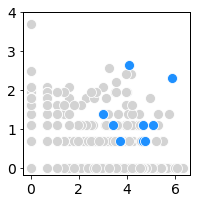

In [37]:
gene1 = 'Krt10'
gene2 = 'Krt14'

tmp_df = velo_data.obs.copy()
gs = []
for g, l in itertools.product([gene1,gene2], ['spliced','unspliced']):
    tmp_df['{}_{}'.format(g, l)] = velo_data[:, g].layers[l].toarray()
    gs.append(f'{g}_{l}')
tmp_df['binned_delamination'] = tmp_df['binned_delamination'].astype(str).str[:-2].astype('category')
tmp_df['binned_delamination'].cat.categories = sorted(tmp_df['binned_delamination'].cat.categories, key = lambda x: int(x))

tmp_df['binned_delamination_int'] = tmp_df['binned_delamination'].astype(int)
for g in gs:
    tmp_df[f'{g}_log'] = np.log1p(tmp_df[g])

#axis_groups = [[f'{gene1}_spliced', f'{gene2}_spliced'], [f'{gene1}_unspliced', f'{gene2}_spliced'], [f'{gene1}_spliced', f'{gene2}_unspliced'], [f'{gene1}_unspliced', f'{gene2}_unspliced']] 
ncols = 1
fig, ax = initialize_subplots(groups_to_plot=1, ncols = ncols, figsize_multiplier = (3,3), gridspec_kw = {'wspace': 0.05, 'hspace': 0.05}, sharex = False, sharey = False)

cell_filter = (tmp_df[f'{gene1}_unspliced']>0) & (tmp_df[f'{gene1}_spliced']>0) & (tmp_df[f'{gene2}_unspliced']>0) & (tmp_df[f'{gene2}_spliced']>0)

x = f'{gene1}_spliced'
y = f'{gene2}_unspliced'
sbn.scatterplot(data = tmp_df, x = f'{x}_log', y = f'{y}_log', color = 'lightgrey', ax = ax, s = 100)
sbn.scatterplot(data = tmp_df[cell_filter], x = f'{x}_log', y = f'{y}_log', color = 'dodgerblue', ax = ax, s = 100)
ax.legend('', frameon = False)
ax.set_ylabel(f'{y}_log')
ax.set_xlabel(f'{x}_log')
ax.set_ylim([ax.get_ylim()[0], 4])
ax.set_yticks(np.arange(0,5, 1))
ax.set_ylabel('', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

#handles, labels = ax.get_legend_handles_labels()
#fig.savefig(os.path.join(fig_path, f'Main_dataset_scvelo_{x}_{y}_scatterplot_log_Blue.pdf'), dpi = 600, bbox_inches = 'tight')

### Krt14 vs Krtdap

ax = axes[ix]


[None, None, None, None, None, None, None, None, None, None]

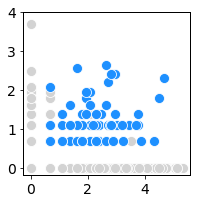

In [38]:
gene1 = 'Krtdap'
gene2 = 'Krt14'

tmp_df = velo_data.obs.copy()
gs = []
for g, l in itertools.product([gene1,gene2], ['spliced','unspliced']):
    tmp_df['{}_{}'.format(g, l)] = velo_data[:, g].layers[l].toarray()
    gs.append(f'{g}_{l}')
tmp_df['binned_delamination'] = tmp_df['binned_delamination'].astype(str).str[:-2].astype('category')
tmp_df['binned_delamination'].cat.categories = sorted(tmp_df['binned_delamination'].cat.categories, key = lambda x: int(x))

tmp_df['binned_delamination_int'] = tmp_df['binned_delamination'].astype(int)
for g in gs:
    tmp_df[f'{g}_log'] = np.log1p(tmp_df[g])

#axis_groups = [[f'{gene1}_spliced', f'{gene2}_spliced'], [f'{gene1}_unspliced', f'{gene2}_spliced'], [f'{gene1}_spliced', f'{gene2}_unspliced'], [f'{gene1}_unspliced', f'{gene2}_unspliced']] 
ncols = 1
fig, ax = initialize_subplots(groups_to_plot=1, ncols = ncols, figsize_multiplier = (3,3), gridspec_kw = {'wspace': 0.05, 'hspace': 0.05}, sharex = False, sharey = False)

cell_filter = (tmp_df[f'{gene1}_unspliced']>0) & (tmp_df[f'{gene1}_spliced']>0) & (tmp_df[f'{gene2}_unspliced']>0) & (tmp_df[f'{gene2}_spliced']>0)

x = f'{gene1}_spliced'
y = f'{gene2}_unspliced'
sbn.scatterplot(data = tmp_df, x = f'{x}_log', y = f'{y}_log', color = 'lightgrey', ax = ax, s = 100)
sbn.scatterplot(data = tmp_df[cell_filter], x = f'{x}_log', y = f'{y}_log', color = 'dodgerblue', ax = ax, s = 100)
ax.legend('', frameon = False)
ax.set_ylabel(f'{y}_log')
ax.set_xlabel(f'{x}_log')
ax.set_ylim([ax.get_ylim()[0], 4])
ax.set_yticks(np.arange(0,5, 1))
ax.set_ylabel('', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

#handles, labels = ax.get_legend_handles_labels()
#fig.savefig(os.path.join(fig_path, f'Main_dataset_scvelo_{x}_{y}_scatterplot_log_Blue.pdf'), dpi = 600, bbox_inches = 'tight')

# Figure 3

## 3A

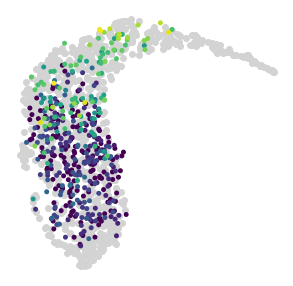

In [39]:
fig, ax = plt.subplots(1, figsize = (5,5))
tmp = adata[adata.obs['batch']!='10x'].obsm['X_umap']
ax.scatter(x = tmp[:, 0], y = tmp[:, 1], color = 'lightgrey')
sc.pl.umap(adata[(adata.obs['batch']=='10x') & (adata.obs['phase_c0.05'].isin(['G2M','S']))], 
           color = ['Krt10'], s = 100, frameon = False, ax = ax, show = False, title = '')
ax.collections[-1].colorbar.remove()
clear_output()
#fig.savefig(os.path.join(fig_path, 'IFE_umap_10x_Krt10_expression_in_cycling_cells.png'), transparent = True, bbox_inches = 'tight', dpi = 600)

## 3B

In [40]:
k10_stat = ['Krt10+', 'Krt10-']
rep_df = pd.DataFrame(columns = k10_stat, index = tmp10x.obs['replicates'].cat.categories)
tmp = tmp10x[tmp10x.obs['phase_c0.05'].isin(['G2M', 'S'])]
for rep in tmp10x.obs['replicates'].cat.categories:
    rep_df.loc[rep] = tmp[tmp.obs['replicates']==rep].obs['Krt10_class_mean'].value_counts(normalize = True).loc[k10_stat]

In [41]:
rep_df = rep_df.stack().reset_index()
rep_df = rep_df.rename(columns = {'level_0':'Replicate','level_1':'Krt10_class_mean',0:'Percentage'})
rep_df = rep_df.set_index('Replicate')
rep_df['stage'] = ['Telogen' if '9wk' in x else 'Anagen' for x in rep_df.index]
rep_df

,Krt10_class_mean,Percentage,stage
Replicate,,,
5wk1,Krt10+,0.267606,Anagen
5wk1,Krt10-,0.732394,Anagen
5wk2,Krt10+,0.215385,Anagen
5wk2,Krt10-,0.784615,Anagen
5wk3,Krt10+,0.216216,Anagen
5wk3,Krt10-,0.783784,Anagen
9wk1,Krt10+,0.28125,Telogen
9wk1,Krt10-,0.71875,Telogen
9wk2,Krt10+,0.243478,Telogen


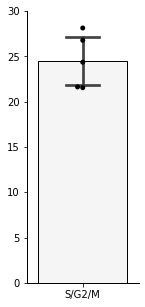

In [42]:
fig, ax = plt.subplots(1, figsize = (2,5))
sbn.barplot(data = rep_df, x = 'Krt10_class_mean', y = 'Percentage', color = 'whitesmoke', ax = ax, order = ['Krt10+'], capsize=0.3, edgecolor = 'k', ci = 'sd')
sbn.swarmplot(data = rep_df, x = 'Krt10_class_mean', y = 'Percentage', ax = ax, order = ['Krt10+'], color = 'k', size = 5)
ax.set_yticks(np.arange(0,0.31, 0.05))
ax.set_yticklabels(np.arange(0,31,5))
ax.set_xlabel('')
ax.set_xticklabels(['S/G2/M'])
ax.set_ylabel('')

for loc in ['right','top']:
    ax.spines[loc].set_visible(False)
#fig.savefig(os.path.join(fig_path, 'IFE_Krt10_percentages_in_cycling_cells.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

# Figure S4

## S4C

## Read in raw and downsampled data

In [43]:
def get_count_matrix(adata, use_raw = False):
    if use_raw:
        if scipy.sparse.issparse(adata.X):
            return adata.raw.X.A
        else:
            return adata.raw.X
    else:
        if scipy.sparse.issparse(adata.X):
            return adata.X.A
        else:
            return adata.X

In [46]:
path = '/mnt/g/My Drive/MKA/Papers/Greco/Katie/2022_NCB_Final/Data upload'

In [47]:
raw_data = sc.read_csv(os.path.join(path, f'{filename}_raw_counts.csv'))
raw_data.obs = adata.obs.loc[raw_data.obs_names]
raw_data

AnnData object with n_obs × n_vars = 2646 × 20618
    obs: 'batch', 'cell_identity', 'Ivl_cells', '10x_leiden', 'total_counts', 'total_counts_ERCC', 'total_counts_mito', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_ERCC', 'log1p_total_counts_mito', 'n_genes_by_counts', 'pct_counts_ERCC', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'pct_counts_mito', 'S_score', 'G2M_score', 'phase_c0.05', 'Krt10 class', 'Krt10_class_mean', 'Location', 'clustering', 'pred_cluster_imp', 'dpt_ordered', 'dpt_pseudotime', 'binned_delamination', 'dpt_binned', 'umap_density_Ivl_cells', 'umap_density_Krt10 class', 'umap_density_batch', 'umap_density_cell_identity', 'umap_density_pred_cluster'

In [49]:
downsampled_data = sc.read_csv(os.path.join(path, f'{filename}_downscaled_raw_counts.csv'))
downsampled_data.obs = adata.obs.loc[downsampled_data.obs_names]
downsampled_data

AnnData object with n_obs × n_vars = 2646 × 20618
    obs: 'batch', 'cell_identity', 'Ivl_cells', '10x_leiden', 'total_counts', 'total_counts_ERCC', 'total_counts_mito', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_ERCC', 'log1p_total_counts_mito', 'n_genes_by_counts', 'pct_counts_ERCC', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'pct_counts_mito', 'S_score', 'G2M_score', 'phase_c0.05', 'Krt10 class', 'Krt10_class_mean', 'Location', 'clustering', 'pred_cluster_imp', 'dpt_ordered', 'dpt_pseudotime', 'binned_delamination', 'dpt_binned', 'umap_density_Ivl_cells', 'umap_density_Krt10 class', 'umap_density_batch', 'umap_density_cell_identity', 'umap_density_pred_cluster'

In [50]:
raw_data.obs['batch'] = [x if 'Tomato' not in x else 'ivl' for x in raw_data.obs['cell_identity']]
downsampled_data.obs['batch'] = [x if 'Tomato' not in x else 'ivl' for x in downsampled_data.obs['cell_identity']]
adata.obs['_batch'] = [x if 'Tomato' not in x else 'ivl' for x in adata.obs['cell_identity']]


raw_data.uns['name'] = 'Raw'
downsampled_data.uns['name'] = 'Downsampled'
adata.uns['name'] = 'Final'

replace_dict = {'ife': 'Joost 2016', 'ivl': 'ITGA6 sorted', '10x': 'Joost 2020'}

raw_data.obs['_batch'] = [replace_dict[x] for x in raw_data.obs['batch']]
downsampled_data.obs['_batch'] = [replace_dict[x] for x in downsampled_data.obs['batch']]
adata.obs['_batch'] = [replace_dict[x] for x in adata.obs['_batch']]

In [51]:
for data in [raw_data, downsampled_data]:
    data.var['mito'] = data.var_names.str.startswith('mt')
    data.var['ribo'] = data.var_names.str.startswith('Rps') | data.var_names.str.startswith('Rpl')
    data.var['hemo'] = data.var_names.str.startswith('Hba') | data.var_names.str.startswith('Hbb')

In [52]:
sc.pp.calculate_qc_metrics(raw_data, qc_vars=['mito', 'ribo', 'hemo'], inplace = True, log1p = False)
sc.pp.calculate_qc_metrics(downsampled_data, qc_vars=['mito', 'ribo', 'hemo'], inplace = True, log1p = False)

ax = axes[ix // ncols, ix % ncols]


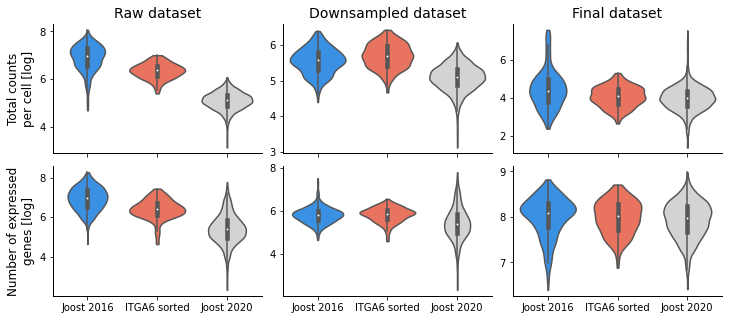

In [53]:
cmap = {'Joost 2016': 'dodgerblue',
        'Joost 2020': 'lightgray',
        'ITGA6 sorted': 'tomato'}

shared_genes = adata.var_names

adatas = [raw_data, downsampled_data, adata]

comps = ['total_counts', 'n_genes_by_counts']
title_dict = {'total_counts': 'Total counts\nper cell [log]', 
              'n_genes_by_counts': 'Number of expressed\ngenes [log]', 
              'pct_counts_mito': 'Percent mitochondrial reads', 
              'pct_counts_ribo': 'Percent ribosomal reads', 
              'pct_counts_hemo': 'Percent hemoglobin reads'}

ncols = len(adatas)
nrows = len(comps)
fig, axes = initialize_subplots(groups_to_plot=ncols*nrows, ncols = ncols, figsize_multiplier=(4,2.5), sharex = True, gridspec_kw = {'hspace':0.1, 'wspace':0.1})

for col, data in enumerate(adatas):
    data = data[:, shared_genes].copy()
    data.obs['total_counts'] = np.log2(get_count_matrix(data).sum(axis = 1))
    data.obs['n_genes_by_counts'] = np.log2((get_count_matrix(data)>0).sum(axis = 1))
    for row, comp in enumerate(comps):
        ax = axes[row, col]
        
        sbn.violinplot(data = data.obs, x = '_batch', y = comp, ax = ax, cut = 0, order = data.obs['_batch'].unique(), palette = cmap)
        [ax.spines[spine].set_visible(False) for spine in ['top', 'right']]
        ylim = ax.get_ylim()
        ax.locator_params(axis='y', nbins=3, tight = False, integer = True, min_n_ticks = 3)
        
        if row==0:
            ax.set_title(f'{data.uns["name"]} dataset', fontsize = 14)
        if col == 0:
            ax.set_ylabel(title_dict[comp], fontsize = 12)
        else:
            ax.set_ylabel('')
            
        ax.set_xlabel('')
        
#fig.savefig(os.path.join(fig_path, 'QC_metric_Comparison_between_datasets_all_counts_v2.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

## S4D

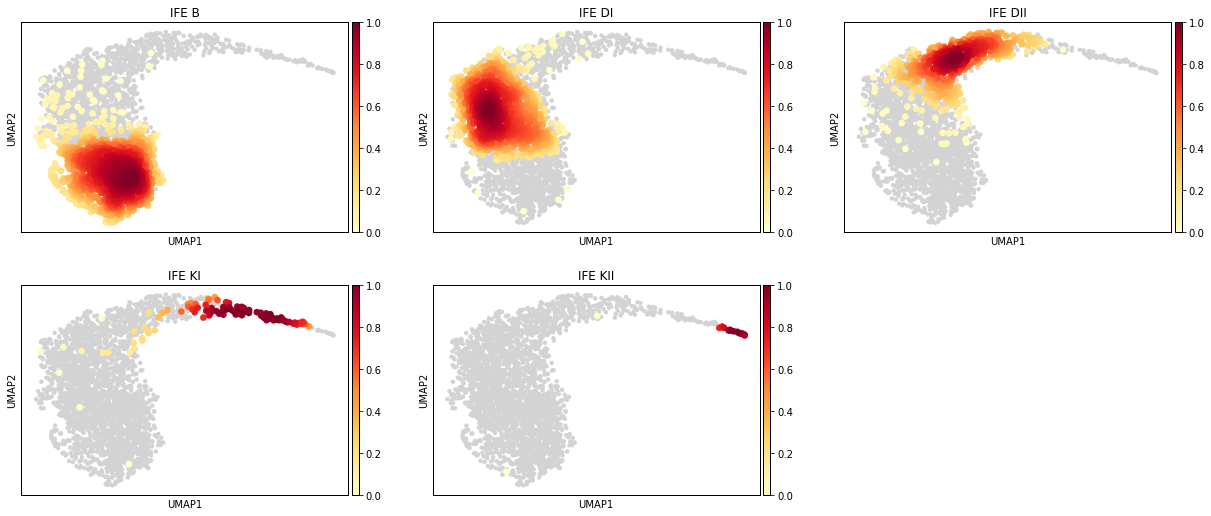

In [54]:
sc.tl.embedding_density(adata, groupby = 'pred_cluster_imp', basis = 'umap')
sc.pl.embedding_density(adata, basis = 'umap', key = 'umap_density_pred_cluster_imp', ncols = 3)

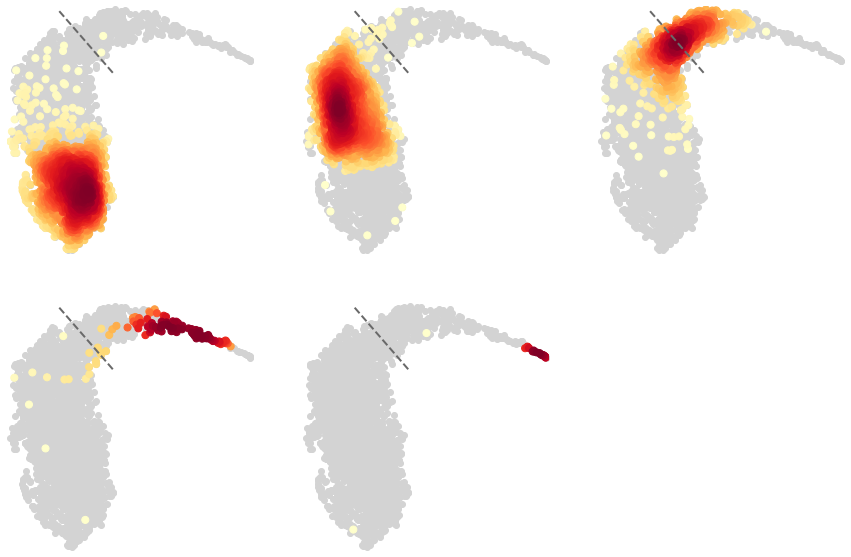

In [55]:
ncols = 3
nrows = 2
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (5*ncols, 5*nrows))

s = 50
add_perc = 0.2
for ix, cat in enumerate([x for x in adata.obs['pred_cluster_imp'].cat.categories if x != '10x']):
    ax = axes[ix//ncols, ix%ncols]
    umap = adata.obsm['X_umap']
    
    tmp_values_pos = adata[adata.obs['pred_cluster_imp']==cat].obs['umap_density_pred_cluster_imp'].values
    tmp_umap_pos = adata[adata.obs['pred_cluster_imp']==cat].obsm['X_umap']
    
    rank = np.argsort(tmp_values_pos)
    sorted_values = tmp_values_pos[rank]
    sorted_umap = tmp_umap_pos[rank]
    
    ax.scatter(x = umap[:, 0], y = umap[:, 1], color = 'lightgrey')
    ax.scatter(x = sorted_umap[:, 0], y = sorted_umap[:, 1], color = [plt.cm.YlOrRd(x) for x in sorted_values], s = s)
    
    ax.set_xlim([umap[:,0].min()-add_perc, umap[:,0].max()+add_perc])
    ax.set_ylim([umap[:,1].min()-add_perc, umap[:,1].max()+add_perc])
    
    plot_basal_suprabasal_cutoff_v2(ax)
    
    clean_axis(ax)
    
clean_subplots(ix, axes, ncols, keep_lone_xticklabels=False)
clear_output()

#fig.savefig(os.path.join(fig_path, 'IFE_umap_embedding-density_pred_cluster_imputated_wider_cutoff.png'), transparent = True, bbox_inches = 'tight', dpi = 600)

# Figure S5

## S5A

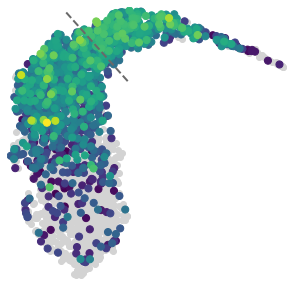

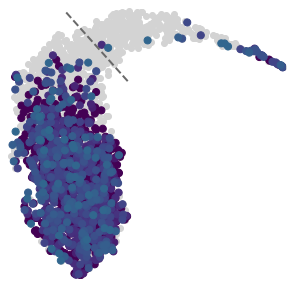

In [56]:
krt10_expr = adata.raw[:, np.where(adata.raw.var_names=='Krt10')[0][0]].X.flatten()

add_perc = 0.2
grouping = 'Krt10_class_mean'
vmax = krt10_expr.max()
for ix, cat in enumerate([x for x in adata.obs[grouping].cat.categories]):
    fig, ax = plt.subplots(figsize = (5,5))
                           
    umap = adata.obsm['X_umap']
    
    tmp_pos = adata[adata.obs[grouping]==cat]
    
    tmp_values_pos = tmp_pos.raw[:, np.where(tmp_pos.raw.var_names=='Krt10')[0][0]].X.flatten()
    tmp_umap_pos = tmp_pos.obsm['X_umap']
    
    rank = np.argsort(tmp_values_pos)
    tmp_values_pos = np.array(tmp_values_pos)[rank]
    tmp_umap_pos = np.array(tmp_umap_pos)[rank]

    ax.scatter(x = umap[:, 0], y = umap[:, 1], color = 'lightgrey')
    ax.scatter(x = tmp_umap_pos[:, 0], y = tmp_umap_pos[:, 1], c = tmp_values_pos, cmap = 'viridis', s = 50, alpha = 1, vmax = vmax)
    
    
    ax.set_xlim([umap[:,0].min()-add_perc, umap[:,0].max()+add_perc])
    ax.set_ylim([umap[:,1].min()-add_perc, umap[:,1].max()+add_perc])
    
    plot_basal_suprabasal_cutoff_v2(ax = ax)
    clean_axis(ax)
    
    #fig.savefig(os.path.join(fig_path, 'IFE_umap_expression_{}_{}_wider.pdf'.format(grouping, cat)), transparent = True, bbox_inches = 'tight', dpi = 600)
clear_output()

## S5B

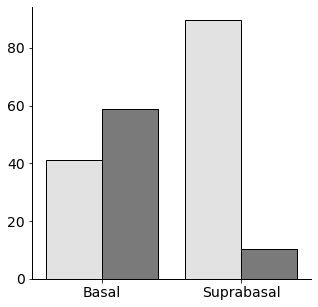

In [57]:
palette = sbn.color_palette(palette = 'Greys', n_colors = 4)

fig, ax = plt.subplots(figsize = (5,5))

df = (adata.obs.groupby('Location')['Krt10_class_mean'].value_counts().div(adata.obs.groupby('Location')['Krt10_class_mean'].count())*100).reset_index(name='Percentage')
df.columns = ['Location', 'Krt10_class_mean', 'Percentage']
sbn.barplot(data = df, y = 'Percentage', x = 'Location', hue = 'Krt10_class_mean', hue_order = ['Krt10+','Krt10-'], 
            palette = [palette[0], palette[-2]], ax = ax, edgecolor = 'k')
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)

ax.legend(handles = [], frameon = False)

#fig.savefig(os.path.join(fig_path, 'IFE_Barplot_Krt10_percentage_mean.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

## S5C

### Load integrated Aragona data

In [58]:
path = '{}/My Drive/MKA/Epidermal stem cells at the point of no return/Sequencing results/Combined_With_Joost_IFE/'.format(root)
filename = '20201022_Aragona_merged_to_combined'

aragona_data = sc.read_loom(os.path.join(path, '{}.loom'.format(filename)))
clear_output()

Text(0.5, 1.0, 'Aragona Clusters')

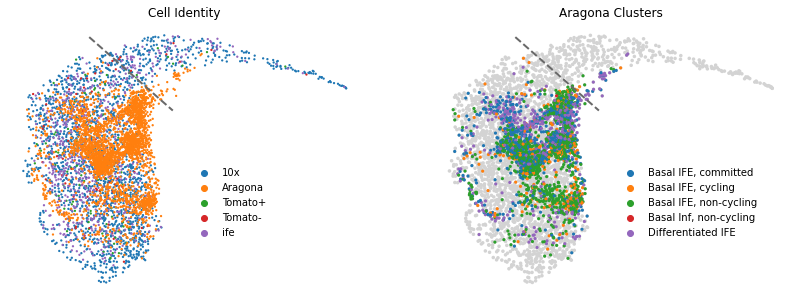

In [59]:
fig, axes = plt.subplots(ncols = 2, figsize = (14, 5))

ax = axes[0]
sc.pl.umap(aragona_data, color = 'cell_identity', frameon = False, ax = ax, show = False)
plot_basal_suprabasal_cutoff_v2(ax, x1 = 1.5)
ax.legend(bbox_to_anchor = (0.5, 0.5), frameon = False)
ax.set_title('Cell Identity')

ax = axes[1]
sc.pl.umap(aragona_data, frameon = False, ax = ax, show = False, s = 50)
sc.pl.umap(aragona_data[aragona_data.obs['cell_identity']=='Aragona'], color = 'comb_clusters', frameon = False, ax = ax, show = False)
plot_basal_suprabasal_cutoff_v2(ax, x1 = 1.5)
ax.legend(bbox_to_anchor = (0.5, 0.5), frameon = False)
ax.set_title('Aragona Clusters')
    
#fig.savefig(os.path.join(fig_path, 'Aragona_ingest_scaled_independently.png'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 300)

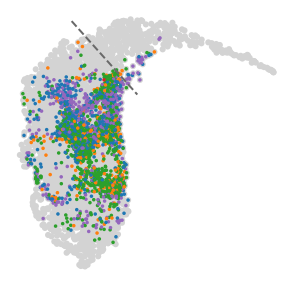

In [60]:
fig, ax = plt.subplots(figsize = (5,5))
sc.pl.umap(aragona_data, frameon = False, ax = ax, show = False, s = 150)
sc.pl.umap(aragona_data[aragona_data.obs['cell_identity']=='Aragona'],
           color = 'comb_clusters', frameon = False, ax = ax, 
           show = False, title = '', s = 50)
plot_basal_suprabasal_cutoff_v2(ax, x1 = 1.5)
ax.legend(bbox_to_anchor = (0.5, 0.5), frameon = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()
#fig.savefig(os.path.join(fig_path, 'UMAP_Aragona_combined_data.pdf'), pad_inches = 0, bbox_inches = 'tight', dpi = 600)

 ## S5D

In [61]:
colors = adata.uns['pred_cluster_imp_colors']
n_colors = 11

norm=plt.Normalize(0,n_colors)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", [mpl.colors.to_rgb(x) for x in colors])
m = mpl.cm.ScalarMappable(cmap=cmap, norm = norm)
c = [mpl.colors.to_hex(m.to_rgba(x)) for x in np.arange(0,10)]

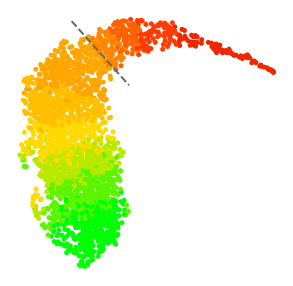

In [62]:
fig, ax = plt.subplots(figsize = (5,5))
sc.pl.umap(adata, color = 'binned_delamination', palette = c, 
           ax = ax, show = False, frameon = False, title = '', s = 100)
handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()

plot_basal_suprabasal_cutoff_v2(ax)

#fig.savefig(os.path.join(fig_path, 'UMAP_Binned_dpt_pseudotime.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

[<AxesSubplot:>]


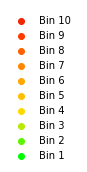

In [63]:
fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles[::-1], labels = ['Bin {}'.format(int(float(x))) for x in labels][::-1],
     frameon = False)
clean_axis(ax)
#fig.savefig(os.path.join(fig_path, 'UMAP_Binned_dpt_pseudotime_legend.pdf'), pad_inches = 0, bbox_inches = 'tight', dpi = 600)

## S5E

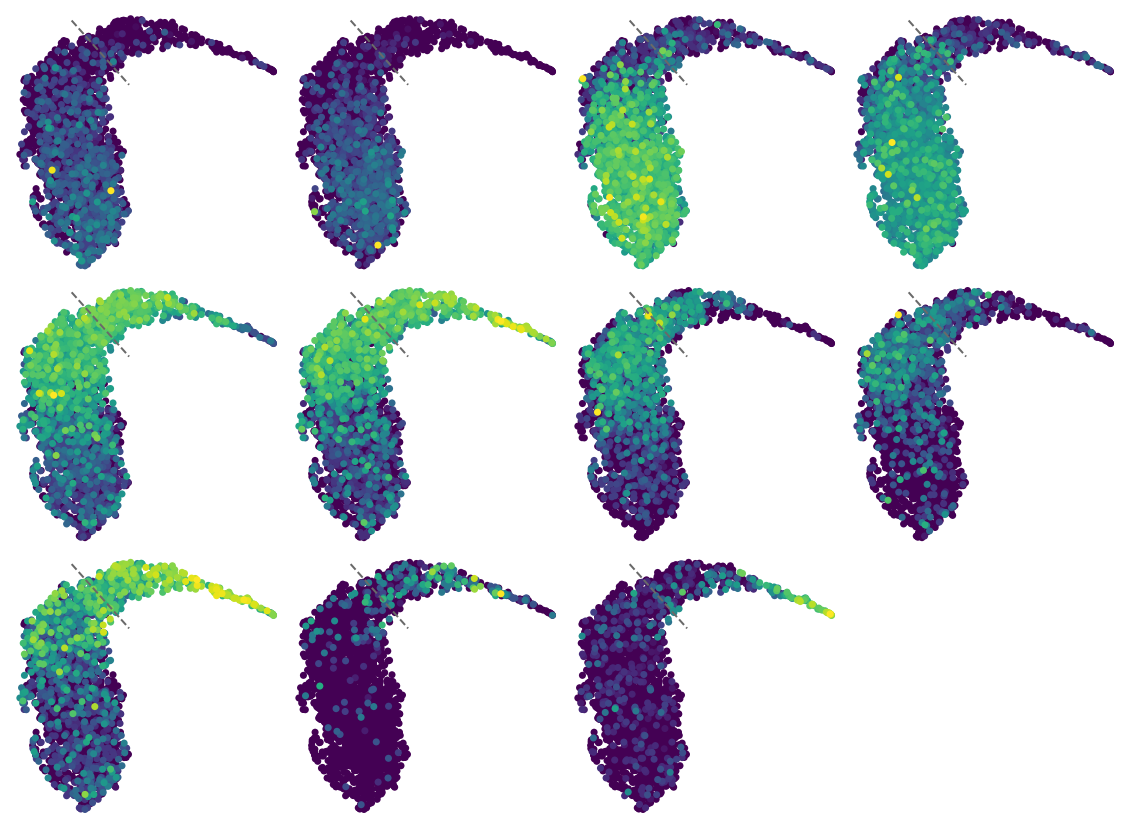

In [64]:
genes = ['Itga6', 'Ly6a', 'Krt14', 'Krt5', 'Krt10', 'Krtdap', 'Krt1', 'Mt4', 'Sbsn','Ivl','Lor']

ncols = 4
fig, axes = initialize_subplots(len(genes), ncols=ncols, figsize_multiplier=(5,5), gridspec_kw= {'hspace':0, 'wspace': 0})

s = 200
for ix, gene in enumerate(genes):
    ax = axes[ix//ncols, ix%ncols]
    sc.pl.umap(adata, color = gene, show = False, frameon = False, ax = ax, s = s, title = '')
    
    ax.collections[-1].colorbar.remove()
    plot_basal_suprabasal_cutoff_v2(ax) 
    clean_axis(ax)
    
clean_subplots(ix, axes, ncols, keep_lone_xticklabels=False)
clear_output()

#fig.savefig(os.path.join(fig_path, 'UMAP_gene_expression_Fig1-genes.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

## S5F

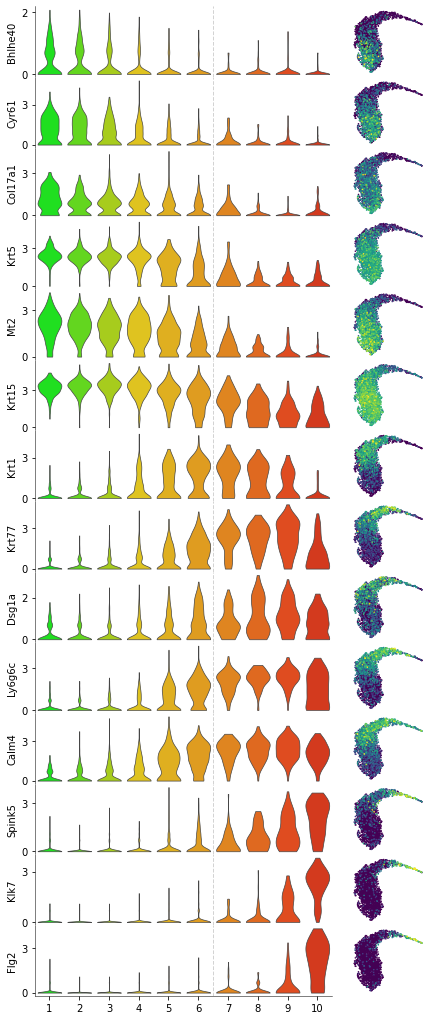

In [65]:
mpl.rcParams['axes.linewidth'] = 0.5
fig1_genes = ['Itga6', 'Ly6a', 'Krt14', 'Krt10', 'Krtdap', 'Mt4', 'Ptgs1', 'Sbsn','Ivl','Lor'] #genes plotted on Fig1D
genes = ['Krt10', 'Krtdap', 'Sbsn', 'Krt14', 'Bhlhe40', 'Itga6','Ly6a', 'Cyr61', 'Col17a1', 'Krt5', 'Mt2', 'Krt15', 'Mt4', 'Krt1', 'Krt77', 'Dsg1a', 'Ly6g6c', 'Calm4', 'Spink5', 'Klk7', 'Flg2', 'Lor']
genes = [g for g in genes if g not in fig1_genes]

percentile = 99.9

ncols = 2
fig, axes = initialize_subplots(groups_to_plot=len(genes)*2, ncols = ncols, figsize_multiplier=(3.5,1.3), 
                                gridspec_kw= {'hspace':0, 'wspace': 0.1, 'width_ratios': [4,1]}, )
for ix, gene in enumerate(genes):
    ax0 = axes[ix, 0]
    ax1 = axes[ix, 1]
    
    expr = adata.raw[:, gene].X
    vmax = np.percentile(expr, q = percentile)
    
    sc.pl.violin(adata, keys = gene, groupby = 'binned_delamination', cut = 0, rotation = 0, ax = ax0, show = False, stripplot = False, linewidth = 0.7, palette = c)
    
    ax0.yaxis.set_major_locator(MaxNLocator(integer=True, nbins = 2))
    if ix < len(genes)-1:
        ax0.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
        
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    
                  
    if ix == len(genes)-1:
        ax0.set_xticklabels([str(int(float(x.get_text()))) for x in ax0.get_xticklabels()])
    else:
        ax0.spines['bottom'].set_visible(False)
    ax0.axvline(5.5, ls = '--', c = 'lightgrey', lw = 1)
    
    sc.pl.umap(adata, color = gene, ax = ax1, show = False, frameon = False, title = '', s = 10, vmax = vmax)
    ax1.set_ylim([ax1.get_ylim()[0]-0.5, ax1.get_ylim()[1]+0.5])
    # Remove umap colorbar
    ax1.collections[-1].colorbar.remove()
mpl.rcParams['axes.linewidth'] = 1
clear_output()
#fig.savefig(os.path.join(fig_path, 'Binned_dpt_pseudotime_violinplot_UMAP_All_v1.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 600)

# Figure S7

## S7A

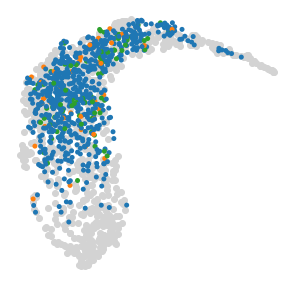

In [66]:
fig, ax = plt.subplots(1, figsize = (5,5))
tmp = adata[adata.obs['batch']!='10x'].obsm['X_umap']
ax.scatter(x = tmp[:, 0], y = tmp[:, 1], color = 'lightgrey')
sc.pl.umap(adata[(adata.obs['batch']=='10x') & (adata.obs['Krt10_class_mean']=='Krt10+')], 
           color = ['phase_c0.05'], s = 100, frameon = False, ax = ax, show = False, title = '')
handles, labels = ax.get_legend_handles_labels()
ax.legend('', frameon = False)
clear_output()
#fig.savefig(os.path.join(fig_path, 'IFE_umap_10x_Krt10-pos_cc.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

[<AxesSubplot:>]


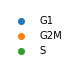

In [67]:
fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles, labels = labels, frameon = False)
clean_axis(ax)
#fig.savefig(os.path.join(fig_path, 'IFE_umap_10x_Krt10-pos_cc_legend.pdf'), pad_inches = 0, bbox_inches = 'tight', dpi = 600)

## S7B

In [68]:
phases = ['G1','S','G2M']
rep_df = pd.DataFrame(columns = phases, index = tmp10x.obs['replicates'].cat.categories)
tmp = tmp10x[tmp10x.obs['Krt10 class']=='Krt10+']
for rep in tmp10x.obs['replicates'].cat.categories:
    rep_df.loc[rep] = tmp[tmp.obs['replicates']==rep].obs['phase_c0.05'].value_counts(normalize = True).loc[phases]

In [69]:
rep_df = rep_df.stack().reset_index()
rep_df = rep_df.rename(columns = {'level_0':'Replicate','level_1':'Phase',0:'Percentage'})
rep_df = rep_df.set_index('Replicate')
rep_df['stage'] = ['Telogen' if '9wk' in x else 'Anagen' for x in rep_df.index]

In [70]:
rep_df

,Phase,Percentage,stage
Replicate,,,
5wk1,G1,0.769231,Anagen
5wk1,S,0.141026,Anagen
5wk1,G2M,0.089744,Anagen
5wk2,G1,0.844156,Anagen
5wk2,S,0.077922,Anagen
5wk2,G2M,0.077922,Anagen
5wk3,G1,0.777778,Anagen
5wk3,S,0.166667,Anagen
5wk3,G2M,0.055556,Anagen


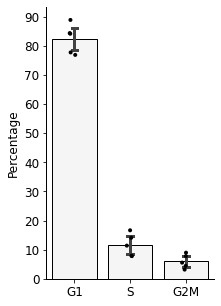

In [71]:
fig, ax = plt.subplots(1, figsize = (3,5))
sbn.barplot(data = rep_df, x = 'Phase', y = 'Percentage', color = 'whitesmoke', ax = ax, edgecolor = 'k', capsize = 0.1, errwidth=3)
sbn.stripplot(data = rep_df, x = 'Phase', y = 'Percentage', color = 'k', ax = ax, s = 4)
ax.set_yticks(np.arange(0,0.91, 0.10))
ax.set_yticklabels(np.arange(0,91, 10))

ax.set_xlabel('')
ax.set_xticklabels(['G1','S','G2M'],fontsize=12)
ax.set_ylabel('Percentage',fontsize=12)
ax.tick_params(labelsize=12)

for loc in ['right','top']:
    ax.spines[loc].set_visible(False)
    
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#fig.savefig(os.path.join(fig_path, 'IFE_Krt10_cc_percentages_v2.pdf'), transparent = True, bbox_inches = 'tight', dpi = 600)

## S7C

In [72]:
tmp_data.obs['replicates'] = tmp_data.obs['replicates'].astype('category')

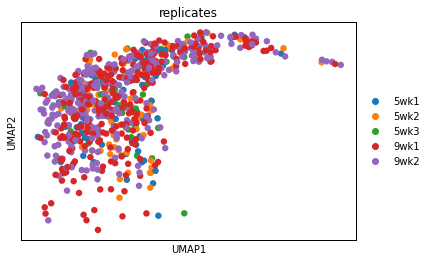

In [73]:
sc.pl.umap(tmp_data, color = 'replicates')

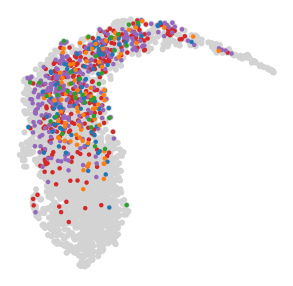

In [74]:
fig, ax = plt.subplots(ncols = 1, figsize = (5, 5))
sc.pl.umap(adata, ax = ax, show = False, s = 150)
for g in tmp_data.obs['replicates'].value_counts().index:
    sc.pl.umap(tmp_data[tmp_data.obs['replicates']==g], color = 'replicates', ax = ax, show = False, use_raw = True, s = 80, frameon = False, )
ax.set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend('', frameon = False)
#fig.savefig(os.path.join(fig_path, 'UMAP_replicates_10x_K10_cycling.pdf'), pad_inches = 0.1, bbox_inches = 'tight', dpi = 100)

[<AxesSubplot:>]


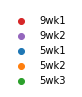

In [75]:
fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles, labels = labels, frameon = False)
clean_axis(ax)
#fig.savefig(os.path.join(fig_path, 'UMAP_replicates_10x_K10_cycling_legend.pdf'), pad_inches = 0, bbox_inches = 'tight', dpi = 600)